In [1]:
import pandas as pd

df = pd.read_csv("Spike glycoprotein/ISUNSTRUCT_KNN_predikcije_YP_138523.1.csv")

rezultati = []

for duzina in sorted(df["Duzina"].unique()):
    df_duzina = df[df["Duzina"] == duzina]
    total_duzina = len(df_duzina)
    
    if total_duzina == 0:
        continue

    counts = {
        "duzina": duzina,
        "uređena uređena": len(df_duzina[(df_duzina["ISUNSTRUCT oznaka"] == "uređena") & (df_duzina["KNN Oznaka"] == "uređena")]),
        "uređena neuređena": len(df_duzina[(df_duzina["ISUNSTRUCT oznaka"] == "uređena") & (df_duzina["KNN Oznaka"] == "neuređena")]),
        "neuređena uređena": len(df_duzina[(df_duzina["ISUNSTRUCT oznaka"] == "neuređena") & (df_duzina["KNN Oznaka"] == "uređena")]),
        "neuređena neuređena": len(df_duzina[(df_duzina["ISUNSTRUCT oznaka"] == "neuređena") & (df_duzina["KNN Oznaka"] == "neuređena")])
    }

    procenti = {k: round((v / total_duzina) * 100, 4) for k, v in counts.items() if k != "duzina"}
    procenti["duzina"] = duzina

    rezultati.append(procenti)

df_izlaz = pd.DataFrame(rezultati)

df_izlaz.to_csv("procenti_po_duzinama_KNN_spikeprotein.csv", index=False)

print("Izlazni CSV fajl je uspešno kreiran!")


Izlazni CSV fajl je uspešno kreiran!


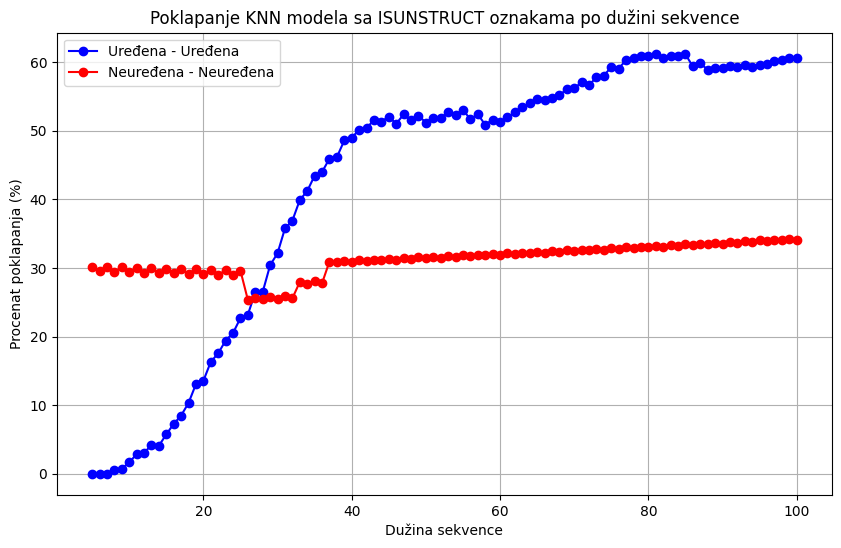

In [3]:
import matplotlib.pyplot as plt

df_izlaz = pd.read_csv("procenti_po_duzinama_KNN_spikeprotein.csv")

# Kreiranje grafikona
plt.figure(figsize=(10, 6))
plt.plot(df_izlaz["duzina"], df_izlaz["uređena uređena"], marker='o', linestyle='-', label="Uređena - Uređena", color="blue")
plt.plot(df_izlaz["duzina"], df_izlaz["neuređena neuređena"], marker='o', linestyle='-', label="Neuređena - Neuređena", color="red")

# Dodavanje oznaka i naslova
plt.xlabel("Dužina sekvence")
plt.ylabel("Procenat poklapanja (%)")
plt.title("Poklapanje KNN modela sa ISUNSTRUCT oznakama po dužini sekvence")
plt.legend()
plt.grid(True)

# Prikaz grafikona
plt.show()
